#1.INTRODUCCION

## **The Abstract**

Este conjunto de datos está relacionado con las variantes tintas de los vinos españoles, describe varias métricas de popularidad y descripción y su efecto sobre su calidad.

Contiene 7.500 tipos diferentes de vinos tintos de España con 12 características que describen su precio, calificación e incluso una descripción del sabor.

## **Contenido**

El dataset contiene 12 columnas:

- Bodega: Nombre de la bodega
- Vino: Nombre del vino
- Año: Año en el que se cosechó la uva.
- Valoración: Valoración media otorgada al vino por los usuarios [de 1 a 5]
- Num_reviews: Número de usuarios que reseñaron el vino
- País: País de origen [España]
- Región: Región del vino
- Precio: Precio en euros [€]
- Tipo: Variedad de vino
- Cuerpo: Puntuación de cuerpo, definida como la riqueza y el peso del vino en la boca [de 1 a 5]
- Acidez: Puntuación de acidez, definida como el “arrugado” o la acidez del vino; es lo que hace que un vino sea refrescante y que tu lengua salive y desee otro sorbo [de 1 a 5]
- Reseña: comentarios del vino

## **Objetivos**
Procesar los textos de revisión para crear un corpus que pueda usarse para diversas tareas de procesamiento del lenguaje natural (NLP). Estas tareas pueden incluir tokenización, derivación, lematización y análisis de sentimientos.

Desarrollar un modelo de aprendizaje automático para analizar el sentimiento de las reseñas. El objetivo es extraer información y patrones significativos de los datos que puedan ayudar a predecir la calidad del vino o los precios utilizando los datos proporcionados.

# 2.LIBRERIAS Y CARGA ARCHIVO

In [42]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Configuración de estilos de visualización
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Procesamiento de texto
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string

# Download NLTK data files
!pip install nltk
nltk.download('punkt')  # Tokenizers
nltk.download('stopwords')  # Stop words
nltk.download('wordnet')  # WordNet lemmatizer
nltk.download('punkt_tab')

# Librerías
from collections import Counter

# Modelado
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [66]:
# Carga del csv
df_reviews = pd.read_excel('/content/wines_SPA.xlsx')

# Vemos las primeras filas del dataframe
df_reviews.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,reviews
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,Este Cabernet Sauvignon tiene un cuerpo robust...
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,"El Sauvignon Blanc es refrescante y afrutado, ..."
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,Me encantó la complejidad de este Merlot; sus ...
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,Este vino espumoso es perfecto para celebracio...
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,El Pinot Noir tiene un bouquet floral encantad...


# 3.EXPLORATORY DATA ANALYSIS (EDA)

## Descripción general

Para comenzar el análisis de los datos vamos a ver la estructura del dataset de manera de entender la cantidad de datos, la clase de variables con las que vamos a trabajar, la existencia de valores nulos o duplicados.

In [6]:
df_reviews.shape

(7500, 12)

El dataset obtenido posee 7.500 filas y 12 columnas.

In [7]:
df_reviews.dtypes

,0
winery,object
wine,object
year,object
rating,float64
num_reviews,int64
country,object
region,object
price,float64
type,object
body,float64


Vemos que los datos contenidos en la columna "Year" tiene formato de texto, por lo que los convertimos en formato de entero y convertimos el tipo de dato de las columnas "Body" y "Acidity" a entero.

In [44]:
df_reviews['year'] = pd.to_numeric(df_reviews['year'], errors='coerce')
df_reviews['year'] = df_reviews['year'].fillna(0).astype(np.int64)
df_reviews.dtypes

,0
winery,object
wine,object
year,int64
rating,float64
num_reviews,int64
country,object
region,object
price,float64
type,object
body,float64


In [9]:
df_reviews.describe()

,year,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,7.500000e+03,6331.000000,6331.000000
mean,1935.640667,4.254933,451.109067,1.472831e+12,4.158427,2.946612
std,388.286030,0.118029,723.001856,2.691525e+13,0.583352,0.248202
min,0.000000,4.200000,25.000000,4.990000e+00,2.000000,1.000000
25%,2011.000000,4.200000,389.000000,1.890000e+01,4.000000,3.000000
50%,2015.000000,4.200000,404.000000,2.853000e+01,4.000000,3.000000
75%,2017.000000,4.200000,415.000000,5.342500e+01,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,9.287163e+14,5.000000,3.000000


Se toma conocimiento de las columnas.

In [10]:
df_reviews.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity', 'reviews'],
      dtype='object')

Analizamos el dataframe para ver si existen datos erróneos o nulos. Miramos la información general del dataframe.

In [11]:
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int64  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
 11  reviews      7500 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 703.2+ KB
None


Vemos el dataset posee 6 variables numéricas y 6 categóricas. También podemos observar que las columnas "Type", "Body" y "Acidity" tienen valores nulos.

In [12]:
df_reviews.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


La columna "Type" posee 545 celdas nulas, la columna "Body" 1.169 y la columna "Acidity" 1.169. Rellenamos los valores nulos de estas últimas dos columnas con la media y los valores nulos de la columna "Type" los rellenamos por "Desconocido" son valores con formato object. Comprobamos que ya no poseemos valores nulos. Comprobamos que ya no poseemos valores nulos.

In [45]:
body_mean = df_reviews['body'].mean()
print ("Body mean: ",body_mean)
acidity_mean = df_reviews['acidity'].mean()
print ("Acidity mean: ",acidity_mean)

Body mean:  4.158426788816932
Acidity mean:  2.9466119096509242


In [46]:
df_reviews['type'] = df_reviews['type'].fillna('desconocido')
df_reviews['body'] = df_reviews['body'].fillna(body_mean)
df_reviews['acidity'] = df_reviews['acidity'].fillna(acidity_mean)
df_reviews.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


Analizamos la existencia de duplicados.

In [15]:
df_reviews.duplicated().value_counts()

,count
True,4549
False,2951


Eliminamos valores duplicados y verificamos la eliminación de los valores duplicados.

In [47]:
dfn_reviews = df_reviews.drop_duplicates().reset_index(drop=True)
dfn_reviews.duplicated().value_counts()

,count
False,2951


Realizamos un análisis de las variables para ver la cantidad de categorías que poseen.

In [17]:
dfn_reviews["winery"].unique()

array(['Teso La Monja', 'Artadi', 'Vega Sicilia', 'Pago de Carraovejas',
       'Toro Albala', 'Bodegas El Nido', 'Valdespino',
       'Dominio de Pingus', 'Alvaro Palacios', 'Ordonez',
       'Bodegas Valduero', 'Vina Sastre', 'Sierra Cantabria',
       'Descendientes de J. Palacios', 'La Rioja Alta',
       'Marques de Murrieta', 'Vinedos de Paganos', 'Emilio Moro',
       'Quinta de la Quietud', 'Bodegas Mauro',
       'Bodega Contador (Benjamin Romeo)', 'Remirez de Ganuza',
       'Bodegas San Roman', 'Pago de Los Capellanes', 'Bodega Numanthia',
       'Alto Moncayo', 'Mas Doix', 'Finca Moncloa', 'Bodegas Roda',
       'Martinet', 'Recaredo', 'Clos Erasmus', 'Barbadillo',
       'Gonzalez-Byass', 'Bodegas Amaren', 'Alvear', 'Equipo Navazos',
       'Morca', 'Territorio Luthier', 'Rafael Palacios', 'Terra Remota',
       'Dehesa de Los Canonigos', 'Miguel Merino', 'Gutierrez de la Vega',
       'Alion', 'Aalto', 'Carmelo Rodero', 'Dominio del Bendito',
       "Mas d'en Gil", 'Casa 

In [18]:
dfn_reviews["wine"].unique()

array(['Tinto', 'Vina El Pison', 'Unico',
       'Unico Reserva Especial Edicion', 'El Anejon',
       'Don PX Convento Seleccion', 'Cuesta de Las Liebres', 'El Nido',
       'Toneles Moscatel', 'Pingus', 'Don PX Pedro Ximenez',
       "L'Ermita Velles Vinyes Priorat", 'Vatan Arena Tinta de Toro',
       'Ribera Del Duero Gran Reserva 12 Anos', 'Pesus Ribera del Duero',
       'Magico', 'La Faraona Bierzo (Corullon)', 'Gran Reserva 890',
       'Valbuena 5o', 'Castillo Ygay Gran Reserva Especial Blanco',
       'La Nieta', 'Malleolus de Valderramiro',
       'Malleolus de Sanchomartin', 'Alabaster', 'La Mula de la Quietud',
       'Terreus Paraje de Cueva Baja', 'Contador Rioja',
       'Maria Remirez de Ganuza', 'Cartago Paraje de Pozo',
       'Parcela El Picon Tinto', 'Termanthia', 'Clon De La Familia',
       'Aquilon Garnacha', 'Quinon de Valmira',
       '1902 Centenary Carignan Priorat', 'Tintilla de Rota',
       'Cirsion Rioja', 'Cami Pesseroles', "Turo d'en Mota", 'Priorat',


In [19]:
dfn_reviews["year"].unique()

array([2013, 2018, 2009, 1999, 1996, 1998, 2010, 1995, 2015, 2011, 2016,
       1970, 1946, 1962, 2019, 2004,    0, 1931, 1979, 2005, 2020, 2014,
       1985, 1929, 2007, 2012, 2017, 2008, 2006, 2000, 2003, 2002, 1991,
       1994, 1990, 1989, 1987, 1986, 1981, 2001, 1968, 1964, 1982, 1974,
       1983, 1955, 1980, 1972, 1953, 1958, 1942, 1965, 1992, 1973, 1997,
       1967, 1975, 1910, 1961, 1954, 1988, 1969, 1951, 1928, 1976, 1949,
       2021, 1959, 1922, 1978, 1925])

Vemos que hay un valor "0" que reemplazamos con "2021".

In [48]:
dfn_reviews['year'] = dfn_reviews['year'].replace(0, 2021)
dfn_reviews["year"].unique()

array([2013, 2018, 2009, 1999, 1996, 1998, 2010, 1995, 2015, 2011, 2016,
       1970, 1946, 1962, 2019, 2004, 2021, 1931, 1979, 2005, 2020, 2014,
       1985, 1929, 2007, 2012, 2017, 2008, 2006, 2000, 2003, 2002, 1991,
       1994, 1990, 1989, 1987, 1986, 1981, 2001, 1968, 1964, 1982, 1974,
       1983, 1955, 1980, 1972, 1953, 1958, 1942, 1965, 1992, 1973, 1997,
       1967, 1975, 1910, 1961, 1954, 1988, 1969, 1951, 1928, 1976, 1949,
       1959, 1922, 1978, 1925])

In [21]:
dfn_reviews["rating"].unique()

array([4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2])

In [22]:
dfn_reviews["num_reviews"].unique()

array([   58,    31,  1793,  1705,  1309,  1209,  1201,   926,   643,
         630,   591,   454,   438,   417,   398,   372,   295,   250,
         217,   211,   174,   172,   145,   139,   125,   118,   103,
          87,    84,    79,    70,    69,    68,    56,    52,    50,
          40,    32,    28,    26, 12421,  5266,  4350,  3929,  3437,
        3164,  3127,  2935,  2826,  2765,  2480,  2419,  2177,  1892,
        1199,  1141,   940,   935,   690,   685,   675,   593,   560,
         543,   511,   476,   442,   425,   393,   347,   312,   308,
         303,   300,   292,   291,   285,   280,   268,   264,   256,
         254,   251,   243,   240,   225,   220,   214,   205,   203,
         196,   184,   173,   171,   137,   136,   134,   133,   132,
         131,   127,   123,   117,   116,   112,   110,   108,   102,
         100,    94,    92,    89,    82,    80,    74,    72,    67,
          65,    64,    63,    60,    59,    57,    53,    51,    49,
          47,    45,

In [23]:
dfn_reviews["country"].unique()

array(['Espana'], dtype=object)

In [24]:
dfn_reviews["region"].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle

In [25]:
dfn_reviews["price"].unique()

array([995.  , 313.5 , 324.95, ...,  16.76,  24.45,  31.63])

In [26]:
dfn_reviews["type"].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', 'desconocido', 'Cava', 'Verdejo', 'Syrah',
       'Monastrell', 'Mencia', 'Sparkling', 'Montsant Red', 'Albarino',
       'Chardonnay', 'Cabernet Sauvignon', 'Sauvignon Blanc'],
      dtype=object)

In [27]:
dfn_reviews["body"].unique()

array([5.        , 4.        , 3.        , 4.15842679, 2.        ])

In [28]:
dfn_reviews["acidity"].unique()

array([3.        , 2.        , 1.        , 2.94661191])

In [31]:
dfn_reviews["reviews"].unique()

array(['"Este Cabernet Sauvignon tiene un cuerpo robusto y un final suave que lo hace perfecto para una cena elegante."',
       '"El Sauvignon Blanc es refrescante y afrutado, ideal para un día de verano."',
       '"Me encantó la complejidad de este Merlot; sus notas de cereza y chocolate son simplemente irresistibles."',
       '"Este vino espumoso es perfecto para celebraciones, con burbujas finas y un sabor cítrico vibrante."',
       '"El Pinot Noir tiene un bouquet floral encantador y un paladar sedoso que me dejó deseando más."',
       '"Este vino rosado es ligero y afrutado, ideal para acompañar una tarde en la terraza."',
       '"El Chardonnay tiene un equilibrio perfecto entre acidez y notas de vainilla, ¡una delicia!"',
       '"Este vino tinto tiene un final largo y especiado que lo hace memorable."',
       '"El Tempranillo es rico y terroso, con un toque de frutas rojas que lo hace muy agradable."',
       '"Este vino dulce es el acompañante perfecto para postres, con 

In [29]:
dfn_reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,2951.0,2.012438e+03,9.646890e+00,1910.00,2011.000000,2015.00,2017.000,2.021000e+03
rating,2951.0,4.339614e+00,1.535778e-01,4.20,4.200000,4.30,4.400,4.900000e+00
num_reviews,2951.0,5.221911e+02,1.149034e+03,25.00,83.000000,389.00,419.500,3.262400e+04
price,2951.0,3.743217e+12,4.281385e+13,4.99,24.450000,42.35,78.575,9.287163e+14
body,2951.0,4.209500e+00,5.643409e-01,2.00,4.000000,4.00,5.000,5.000000e+00
acidity,2951.0,2.933204e+00,2.741117e-01,1.00,2.946612,3.00,3.000,3.000000e+00


In [32]:
dfn_reviews.value_counts()

winery                            wine                                   year  rating  num_reviews  country  region      price         type         body      acidity   reviews                                                                                             
A Coroa                           200 Cestos Godello                     2020  4.3     33           Espana   Valdeorras  2.370000e+01  desconocido  4.158427  2.946612  "El bouquet era plano, no había complejidad en absoluto."                                               1
Muga                              Seleccion Especial (Reserva)           2004  4.2     447          Espana   Rioja       6.500000e+01  Rioja Red    4.000000  3.000000  "Demasiado dulce, parecía más un postre que un vino."                                                   1
                                  Prado Enea Gran Reserva                1982  4.3     90           Espana   Rioja       1.500000e+02  Rioja Red    4.000000  3.000000  "Un vino que se siente más como un error que como una elección."                                        1
                                                                         1985  4.3     75           Espana   Rioja       9.800000e+01  Rioja Red    4.000000  3.000000  "Me decepcionó, ya que tenía muchas burbujas, pero poco sabor."                                         1
                                                                         1989  4.4     72           Espana   Rioja       1.400000e+02  Rioja Red    4.000000  3.000000  "El burbujeo era demasiado agresivo, me resultó incómodo."                                              1
                                                                                                                                                                                                                                                                               ..
Costers del Priorat               Clos Cypres Vinyes Velles (Old Vines)  2015  4.3     111          Espana   Priorato    4.900000e+01  Priorat Red  4.000000  3.000000  "El vino parecía diluido, como si le hubieran agregado agua."                                           1
Costers del Siurana               Clos de L'Obac                         2005  4.5     493          Espana   Priorato    9.287163e+14  Priorat Red  4.000000  3.000000  "Este vino blanco tiene un toque de mineralidad que lo hace muy interesante."                           1
                                                                         2009  4.3     51           Espana   Priorato    7.990000e+01  Priorat Red  4.000000  3.000000  "El burbujeo era incómodo, como si estuviera bebiendo refresco."                                        1
                                                                         2010  4.5     121          Espana   Priorato    8.130000e+01  Priorat Red  4.000000  3.000000  "Este Cabernet Sauvignon tiene un cuerpo robusto y un final aterciopelado que me dejó deseando más."    1
l'Infernal Combier Fischer Gerin  Vinas Viejas Aguilera                  2010  4.3     76           Espana   Priorato    6.900000e+01  Priorat Red  4.000000  3.000000  "El vino tenía un sabor a madera quemada que no me gustó."                                              1
Name: count, Length: 2951, dtype: int64

Creamos unas funciones para poder anotar en barras y ajustar ejes en varios gráficos.

In [49]:
def annotate_bars(ax, total, orientation):
    for p in ax.patches:
        count = p.get_height() if orientation == 'vertical' else p.get_width()
        percentage = f'{100 * count / total:.1f}%'
        if orientation == 'vertical':
            ax.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
        else:
            ax.annotate(f'{count}\n({percentage})', (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=8)

In [50]:
def adjust_axis_limits(ax, orientation, padding):
    if orientation == 'vertical':
        max_height = max([p.get_height() for p in ax.patches])
        plt.ylim(0, max_height * padding)
    elif orientation == 'horizontal':
        max_width = max([p.get_width() for p in ax.patches])
        plt.xlim(0, max_width * padding)
    else:
        raise ValueError("Orientation must be 'vertical' or 'horizontal'.")

## Distribución de sentimientos

Vamos las valoraciones (ratings) y las cantidades por cada una.

In [35]:
ratings=dfn_reviews['rating'].value_counts()
ratings

,count
rating,
4.2,1130
4.3,707
4.4,484
4.5,281
4.6,191
4.7,112
4.8,44
4.9,2


<ipython-input-36-aab7e0588392>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='rating', data=dfn_reviews, palette='viridis')


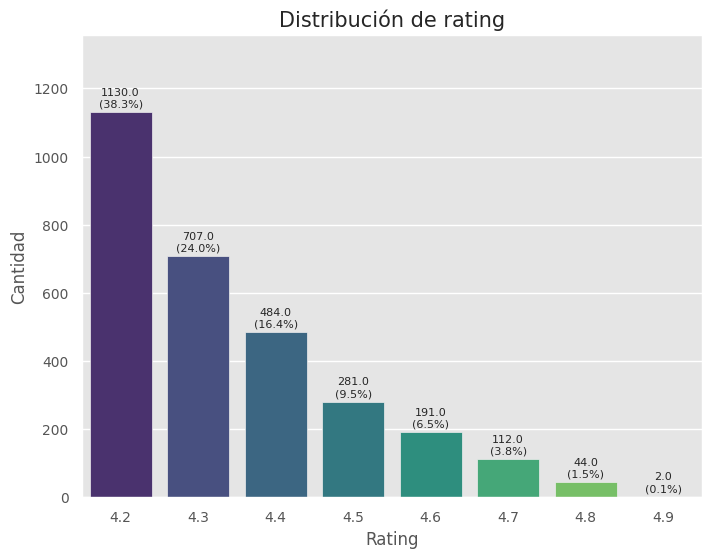

In [36]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='rating', data=dfn_reviews, palette='viridis')
plt.xlabel('Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Cantidad', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Distribución de rating', fontsize=15)

# Agregamos el valor y el porcentage a cada barra
annotate_bars(ax, len(dfn_reviews), 'vertical')

# Adjustamos los límites
adjust_axis_limits(ax, 'vertical', 1.2)

plt.show()

Con fines prácticos consideramos como ratings inferiores a 4,5 como negativos y superiores a 4,5 como positivos.
Agrupamos las variales en dos grupos:

  1- Variales con rating entre 4,0 y 4,4 valor "Negativo".

  2- Variales con rating entre 4,5 y 5,0 valor "Positivo".

In [51]:
dfn_reviews['rating_group'] = np.where(dfn_reviews['rating'] > 4.5, 'Positivo', 'Negativo')

<ipython-input-38-33500fe3e01e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='rating_group', data=dfn_reviews, palette='viridis')


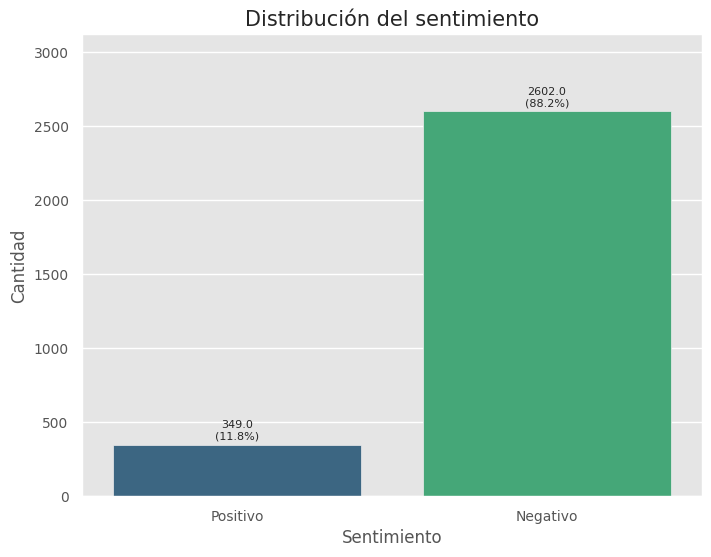

In [38]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='rating_group', data=dfn_reviews, palette='viridis')
plt.xlabel('Sentimiento', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Cantidad', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Distribución del sentimiento', fontsize=15)

annotate_bars(ax, len(dfn_reviews), 'vertical')

adjust_axis_limits(ax, 'vertical', 1.2)

plt.show()

## Distribución por precios

Observamos los distintos precios y cantidades.

In [39]:
Precio = dfn_reviews['price'].value_counts()
Precio

,count
price,
37.90,48
18.90,44
45.00,44
17.90,43
77.36,42
...,...
47.52,1
919.60,1
94.20,1


Como vemos, la mayoría de las variables están por debajo de 100 euros, por lo que filtramos aquellos precios que estén por debajo de 100 euros.

<ipython-input-32-55749ac357c1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='price_group', data=dfn_reviews, palette='YlGnBu')


Text(0.5, 1.0, 'Distribución por rango de precios')

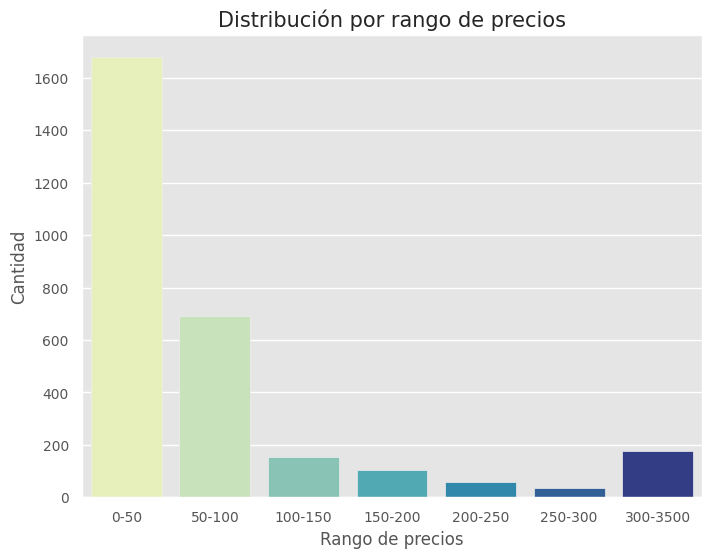

In [32]:
bins = [0, 50, 100, 150, 200, 250, 300, 3500]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300','300-3500']


dfn_reviews['price_group'] = pd.cut(dfn_reviews['price'],
                                    bins=bins,
                                    labels=labels,
                                    right=False,
                                    include_lowest=True)

plt.figure(figsize=(8, 6))
ax=sns.countplot(x='price_group', data=dfn_reviews, palette='YlGnBu')
plt.xlabel('Rango de precios', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Cantidad', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Distribución por rango de precios', fontsize=15)

## Distribución de sentimientos por rango de precios

Combinamos la distribución de sentimiento con la distribución de tango de precios.

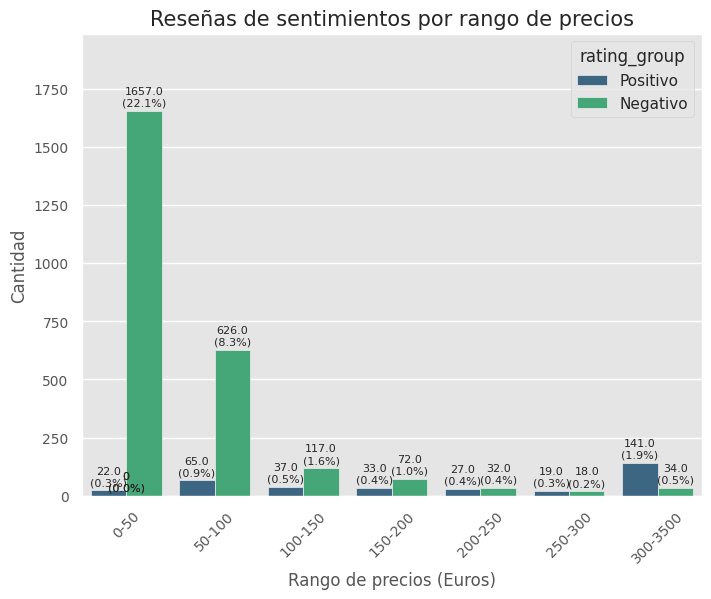

In [41]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data=dfn_reviews, x='price_group', hue='rating_group', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Rango de precios (Euros)', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Cantidad', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Reseñas de sentimientos por rango de precios', fontsize=15)

annotate_bars(ax, len(df_reviews), 'vertical')

adjust_axis_limits(ax, 'vertical', 1.2)

plt.show()

Podemos apreciar que el costo de los vinos más consumidos se ubican en el rango de 0-50 euros y en segundo lugar en el rango de 50-100 euros.

## TOP 5 Bodegas con más reseñas

Bodegas con mayor cantidad de reseñas.

<ipython-input-28-9ee462b5fe57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_winery.values, y=top_winery.index, palette='Oranges')


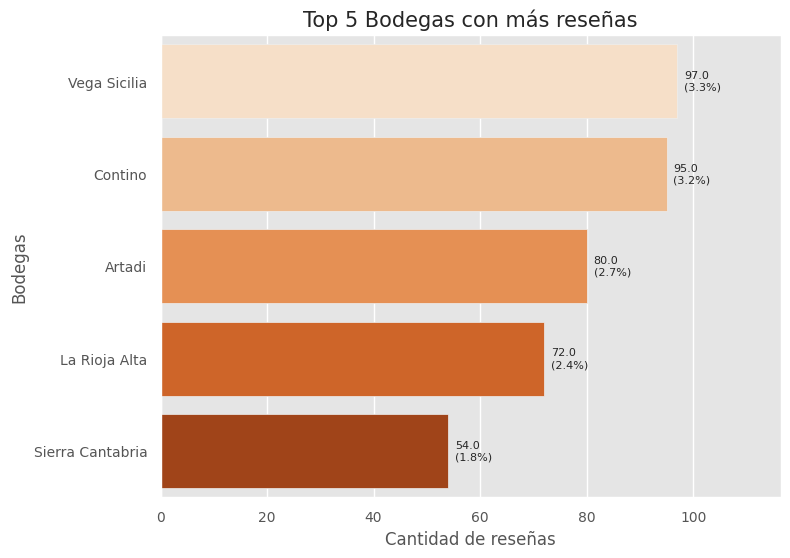

In [28]:
top_winery = dfn_reviews['winery'].value_counts().head(5)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_winery.values, y=top_winery.index, palette='Oranges')
plt.xlabel('Cantidad de reseñas', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Bodegas', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Top 5 Bodegas con más reseñas', fontsize=15)

annotate_bars(ax, len(dfn_reviews), 'horizontal')

adjust_axis_limits(ax, 'horizontal', 1.2)

plt.show()

Bodega Vega Sicilia es la bodega con más cantidad de reseñas con 97 reseñas.

## Distribución de reseñas por año de cosecha

Generamos el gráfico para ver la cantidad de reseñas recibidos para los 10 años de cosecha de la uva que mayor cantidad de reseñas tienen.

<ipython-input-26-79116dfe636b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_year.index, y=top_year.values, palette='Purples', order=top_year.index)


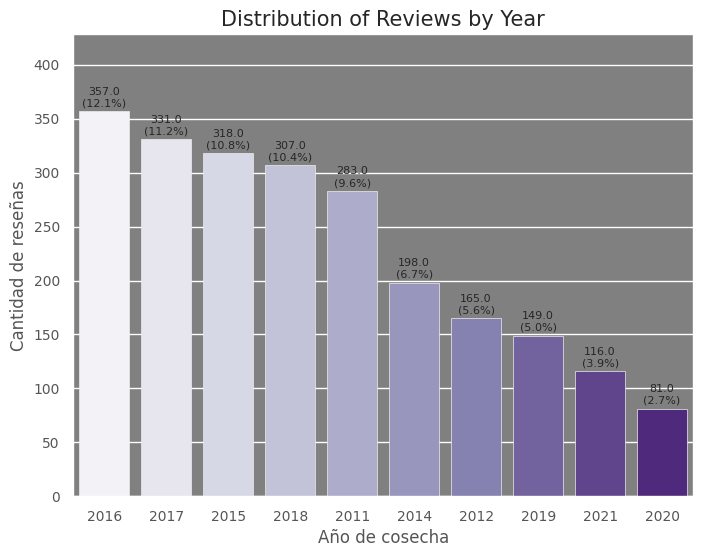

In [26]:
top_year = dfn_reviews['year'].value_counts().head(10)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_year.index, y=top_year.values, palette='Purples', order=top_year.index)
plt.xlabel('Año de cosecha', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Cantidad de reseñas', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Distribution of Reviews by Year', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

annotate_bars(ax, len(dfn_reviews), 'vertical')

adjust_axis_limits(ax, 'vertical', 1.2)

ax.set_facecolor('gray')

plt.show()

Los vinos de cosecha 2016 son los que más cantidad de reseñas tuvieron.

## Word clouds por reseñas

Divimos word cloud para reseñas positivas y reseñas negativas.

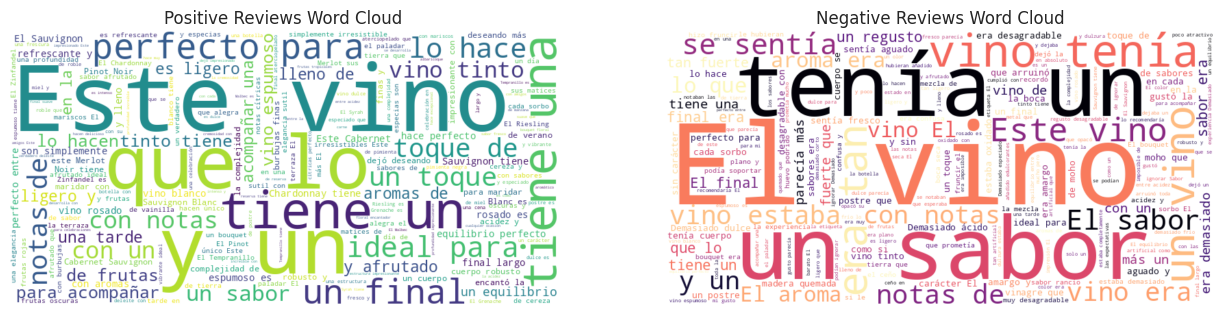

In [67]:
positive_reviews = dfn_reviews[dfn_reviews['rating_group'] == 'Positivo']['reviews'].str.cat(sep=' ')
negative_reviews = dfn_reviews[dfn_reviews['rating_group'] == 'Negativo']['reviews'].str.cat(sep=' ')

positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_reviews)

plt.figure(figsize=(24, 12))

plt.subplot(1,3,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud', fontsize=12)

plt.subplot(1,3,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud', fontsize=12)

plt.show()

Quitamos del análisis palabras que no nos aportan utilidad como artículos.

In [68]:
def remove_articles(text):
    stop_words = set(stopwords.words('spanish'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

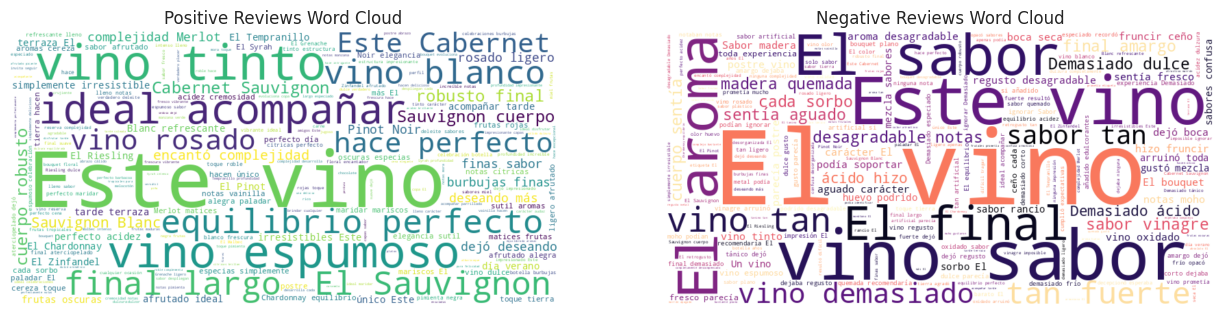

In [69]:
positive_reviews_no_articles = remove_articles(positive_reviews)
negative_reviews_no_articles = remove_articles(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_reviews_no_articles)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_reviews_no_articles)

plt.figure(figsize=(24, 12))

plt.subplot(1,3,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud', fontsize=12)

plt.subplot(1,3,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud', fontsize=12)

plt.show()

# 4.PROCESAMIENTO DEL TEXTO

In [70]:
# Creamos el corpus
corpus = dfn_reviews['reviews'].tolist()

In [71]:
def preprocess(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Lowercase
    words = [word.lower() for word in words]

    # Quitamos signos de puntuación
    words = [word for word in words if word not in string.punctuation]

    # Quitamos stop words
    stop_words = set(stopwords.words('spanish'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

Aplicamos el preprocess al corpus.

In [72]:
corpus = [preprocess(review) for review in corpus]

Vemos las palabras más comunes del corpus después de aplicar el preprocess.

In [73]:
# Convertimos el corpus en una lista de palabras
all_words = [word for sublist in [review.split() for review in corpus] for word in sublist]

# Creamos la frecuencia de la distribución
fdist = Counter(all_words)

# Obtenemos el top 10 de las palabras más comunes
top_10_words = fdist.most_common(10)

print("Most common words:", top_10_words)

Most common words: [('``', 2919), ("''", 2818), ('vino', 1381), ('sabor', 722), ('demasiado', 377), ('tan', 290), ('notas', 267), ('final', 264), ('desagradable', 240), ('aroma', 226)]


Graficamos los resultados obtenidos.

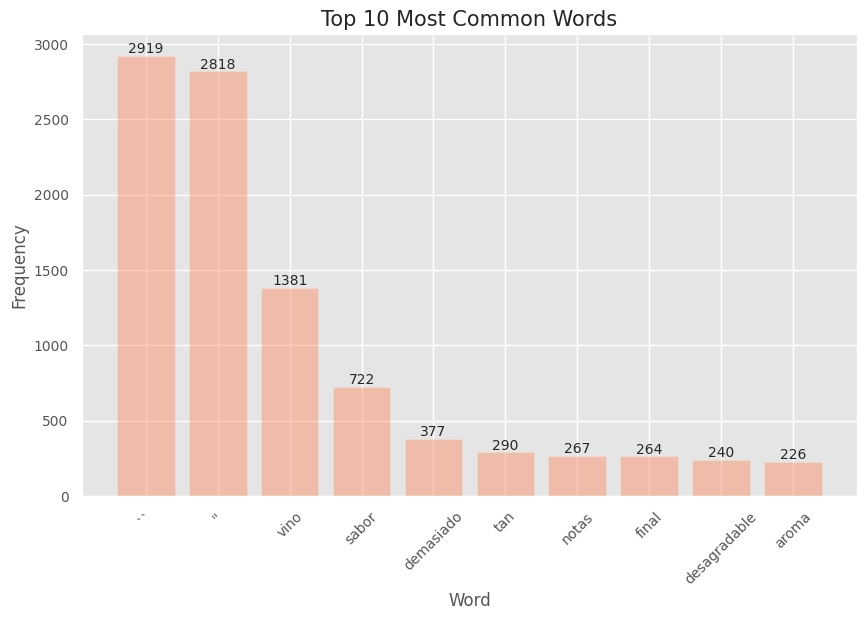

In [75]:
words, frequencies = zip(*top_10_words)

plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies, color='Coral',alpha=0.4)
plt.xlabel('Word', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Top 10 Most Common Words', fontsize=15)
plt.xticks(rotation=45)

for bar, frequency in zip(bars, frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, frequency, ha='center', va='bottom', fontsize=10)

plt.show()

# 5.SELECCION DE FUNCIONES

Usaremos el corpus preprocesado para X y nuestra variable objetivo (y) serán los sentimientos (rating_goup). Así que codifiquémoslos para usar valores numéricos.

In [76]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Encode variable target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dfn_reviews['rating_group'])

Ahora, durante la EDA, cuando calculamos la distribución del sentimiento, nos dimos cuenta de que hay un desequilibrio significativo. Para evitar el sobreajuste, deberíamos aplicar una técnica como el remuestreo con RandomUnderSampler.

In [77]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 6.EL MODELO

Dividimos los datos en conjuntos de entrenamiento, validación y prueba. Creamos varios modelos para evaluar cuál es el mejor para el análisis de sentimiento y usarlo.


In [78]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [79]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 1, 10]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(),
        'params': {
            'learning_rate': [0.1, 0.01],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200]
        }
    }
}

Definimos una función para evaluar los modelos de forma consistente.


In [80]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    confusion = confusion_matrix(y_val, y_pred)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'confusion': confusion}

Entrenamos y evaluamos los modelos.



In [81]:
model_performance = {}
for model_name, config in models.items():
    clf = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1')
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_

    metrics = evaluate_model(best_model, X_train, y_train, X_val, y_val)
    model_performance[model_name] = metrics
    print(f"{model_name}: Accuracy={metrics['accuracy']}, Precision={metrics['precision']}, Recall={metrics['recall']}, F1={metrics['f1']}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

LogisticRegression: Accuracy=0.9285714285714286, Precision=0.8648648648648649, Recall=1.0, F1=0.927536231884058
RandomForestClassifier: Accuracy=0.9142857142857143, Precision=0.8823529411764706, Recall=0.9375, F1=0.9090909090909091
SVC: Accuracy=0.9428571428571428, Precision=0.8888888888888888, Recall=1.0, F1=0.9411764705882353
MultinomialNB: Accuracy=0.9428571428571428, Precision=0.8888888888888888, Recall=1.0, F1=0.9411764705882353
KNeighborsClassifier: Accuracy=0.9428571428571428, Precision=0.8888888888888888, Recall=1.0, F1=0.9411764705882353
XGBClassifier: Accuracy=0.8857142857142857, Precision=0.8529411764705882, Recall=0.90625, F1=0.8787878787878788


Seleccionemos el mejor modelo, según su valor de rendimiento de validación.

In [82]:
best_model_name = max(model_performance, key=lambda k: model_performance[k]['f1'])
best_model = models[best_model_name]['model']

Ahora podemos reajustar el mejor modelo en el conjunto de entrenamiento y predecir en la prueba.

In [83]:
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

Revisamos el modelo en el conjunto de prueba y veamos sus valores métricos.

In [84]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Best Model: SVC
Test Accuracy: 0.9142857142857143
Test Precision: 0.8529411764705882
Test Recall: 0.9666666666666667
Test F1-Score: 0.90625
Confusion Matrix:
[[70 10]
 [ 2 58]]


# 7.COMPROBANDO EL MODELO CON MUESTRAS

Verificamos con algunas revisiones manuales para verificar si la predicción del sentimiento es correcta.

In [85]:
sample_reviews = ["Este vino tiene un cuerpo robusto y un sabor a frutas oscuras que es simplemente delicioso. Perfecto para acompañar una cena de carne.",
                  "Este vino tiene un sabor muy desequilibrado. La acidez es abrumadora y el final es amargo. No lo volvería a comprar."
                  "Un Chardonnay fresco y vibrante, con notas de manzana verde y un toque de vainilla. Ideal para una tarde de verano.",
                  "Al abrir la botella, el aroma era bastante desagradable, con notas de moho. No me atreví a probarlo."
                  "Esperaba un vino tinto seco, pero este era demasiado dulce para mi gusto. No lo recomendaría a quienes prefieren sabores más sutiles"
                  "Este Malbec es una joya. Su sabor a ciruela y especias lo hace perfecto para una parrillada. ¡Definitivamente lo volveré a comprar!",
                  "Refrescante y crujiente, con un aroma a hierbas frescas. Este vino es ideal para maridar con mariscos.",
                  "Este vino se siente muy aguado y ligero. No tiene la profundidad que busco en un buen tinto."
                  "Un vino tinto con una complejidad impresionante. Sus notas de cereza y roble lo hacen perfecto para una cena elegante.",
                  "Este rosado es ligero y afrutado, con un final suave. Perfecto para un picnic en el parque.",
                  "Desafortunadamente, este vino tenía un fuerte sabor a corcho. Fue una decepción total, ya que esperaba algo mucho mejor."
                  "Lo probé con una cena y no combinó bien con la comida. El sabor del vino opacó todo lo demás en la mesa."
                  "Un Pinot Noir excepcional, con un equilibrio perfecto entre acidez y dulzura. Ideal para disfrutar solo o con una tabla de quesos.",
                  "Este Riesling tiene un dulzor encantador y un toque de acidez que lo hace refrescante. Perfecto para postres."]

Preprocesamos la muestra y predecimos.

In [86]:
sample_reviews_preprocessed = [preprocess(review) for review in sample_reviews]
sample_reviews_vectorized = vectorizer.transform(sample_reviews_preprocessed)
sample_predictions = best_model.predict(sample_reviews_vectorized)

Hacemos la predicción para cada ejemplo.

In [87]:
predicted_labels_formatted = [f"Positive ({prediction})" if prediction == 1 else f"Negative ({prediction})" for prediction in sample_predictions]

results = dict(zip(sample_reviews, predicted_labels_formatted))

for review, prediction in results.items():
    print(f"Review: {review}\nPrediction: {prediction}\n")

Review: Este vino tiene un cuerpo robusto y un sabor a frutas oscuras que es simplemente delicioso. Perfecto para acompañar una cena de carne.
Prediction: Positive (1)

Review: Este vino tiene un sabor muy desequilibrado. La acidez es abrumadora y el final es amargo. No lo volvería a comprar.Un Chardonnay fresco y vibrante, con notas de manzana verde y un toque de vainilla. Ideal para una tarde de verano.
Prediction: Positive (1)

Review: Al abrir la botella, el aroma era bastante desagradable, con notas de moho. No me atreví a probarlo.Esperaba un vino tinto seco, pero este era demasiado dulce para mi gusto. No lo recomendaría a quienes prefieren sabores más sutilesEste Malbec es una joya. Su sabor a ciruela y especias lo hace perfecto para una parrillada. ¡Definitivamente lo volveré a comprar!
Prediction: Negative (0)

Review: Refrescante y crujiente, con un aroma a hierbas frescas. Este vino es ideal para maridar con mariscos.
Prediction: Positive (1)

Review: Este vino se siente mu

El modelo parece funcionar razonablemente bien con los datos no vistos. Sin embargo, podemos argumentar que para algunos ejemplos. Existen algunas alternativas para mejorar esto, como expandir el conjunto de datos o probar diferentes modelos.


Hacemos la evaluación con reseñas del corpus.

In [88]:
def get_random_reviews(corpus, num_reviews=10):
  random_indices = random.sample(range(len(corpus)), num_reviews)
  random_reviews = [corpus[i] for i in random_indices]
  return random_reviews

random_reviews = get_random_reviews(corpus, 10)

random_reviews_preprocessed = [preprocess(review) for review in random_reviews]
random_reviews_vectorized = vectorizer.transform(random_reviews_preprocessed)

random_predictions = best_model.predict(random_reviews_vectorized)

random_predicted_labels_formatted = [f"Positive ({prediction})" if prediction == 1 else f"Negative ({prediction})" for prediction in random_predictions]

random_results = dict(zip(random_reviews, random_predicted_labels_formatted))

for review, prediction in random_results.items():
    print(f"Review: {review}\nPrediction: {prediction}\n")

Review: `` color atractivo marrón apagado invitaba beber ''
Prediction: Negative (0)

Review: `` sabor madera quemada recomendaría ''
Prediction: Negative (0)

Review: `` cumplió expectativas sabía vino ''
Prediction: Negative (0)

Review: `` zinfandel jugoso afrutado ideal acompañar parrillada amigo ''
Prediction: Positive (1)

Review: `` vino prometía cumplió ''
Prediction: Negative (0)

Review: `` bouquet desagradable podía identificar ninguna nota positiva ''
Prediction: Negative (0)

Review: `` bouquet plano ofrecía ninguna complejidad ''
Prediction: Negative (0)

Review: `` encantó complejidad merlot matices frutas oscuras especias simplemente irresistibles ''
Prediction: Positive (1)

Review: `` final demasiado corto dejaba buena impresión ''
Prediction: Negative (0)

Review: `` sabor tan plano olvidé bebiendo ''
Prediction: Negative (0)



# 8.CONCLUSION

El objetivo principal de este proyecto fue desarrollar un modelo capaz de clasificar las críticas de una amplia variedad de vinos de España como positivas o negativas (clasificación binaria). Se seleccionó un modelo de SVC (Support Vector Classification) como el mejor, después de evaluarlo e implementarlo en un conjunto de datos de 2.951 reseñas.

Las métricas de desempeño iniciales indicaron resultados prometedores. Sin embargo, un análisis más profundo a través de evaluaciones de muestras manuales y aleatorias reveló algunas limitaciones a la hora de predecir sentimientos. Si bien el modelo clasificó inicialmente de manera correcta las reseñas, tuvo dificultades para categorizar con precisión las reseñas que expresaban emociones encontradas u opiniones sutiles.

Se puede mejorar la generalización del modelo, proporcionando información valiosa para las empresas que buscan comprender el sentimiento del cliente.